In [23]:
import pandas as pd
import re
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.manifold import TSNE

In [24]:
!pip install pyvi

# Data processing and EDA

In [25]:
# 1. Gộp chủ đề GIẢI TRÍ (Giai tri)
df_giaitri = pd.concat([
    pd.read_csv('data_dantri_giaitri.csv'),
    pd.read_csv('data_vnexpress_giaitri.csv')
], ignore_index=True)

# 2. Gộp chủ đề KHOA HỌC (Khoa hoc)
df_khoahoc = pd.concat([
    pd.read_csv('data_dantri_khoahoc.csv'),
    pd.read_csv('data_vnexpress_khoahoc.csv')
], ignore_index=True)

# 3. Gộp chủ đề SỨC KHỎE (Suc khoe)
df_suckhoe = pd.concat([
    pd.read_csv('data_dantri_suckhoe.csv'),
    pd.read_csv('data_vnexpress_suckhoe.csv')
], ignore_index=True)

# 4. Gộp chủ đề THỂ THAO (The thao)
df_thethao = pd.concat([
    pd.read_csv('data_dantri_thethao.csv'),
    pd.read_csv('data_vnexpress_thethao.csv')
], ignore_index=True)

# --- Kiểm tra kết quả ---
print(f"Kích thước df_giaitri: {df_giaitri.shape}")
print(f"Kích thước df_khoahoc: {df_khoahoc.shape}")
print(f"Kích thước df_suckhoe: {df_suckhoe.shape}")
print(f"Kích thước df_thethao: {df_thethao.shape}")

# Xem thử 5 dòng đầu của df_giaitri
print(df_giaitri.head())

Kích thước df_giaitri: (1622, 9)
Kích thước df_khoahoc: (1538, 9)
Kích thước df_suckhoe: (1441, 9)
Kích thước df_thethao: (1561, 9)
                                               title  \
0  Hà Việt Dũng tuổi 39: Vướng tin đồn đào hoa, g...   
1  Con trai 14 tuổi của Lệ Quyên: Cao 1,8m nổi bậ...   
2  Vợ NSND Công Lý: "Tôi nghèo đến mức đi chợ luô...   
3  Tài tử vươn lên đỉnh cao và rơi xuống tuyệt vọ...   
4  Người mẫu khoe sắc vóc gợi cảm, gợi ý mặc đẹp ...   

                                         description  \
0  (Dân trí) - Với ngoại hình điển trai, thường v...   
1                                                NaN   
2  (Dân trí) - Trước những tin đồn về tài chính c...   
3                                                NaN   
4                                                NaN   

                                                body  \
0  Hà Việt Dũng sinh năm 1987, quê ở Hòa Bình cũ ...   
1  Gần đây, hình ảnh Lệ Quyên bên con trai Kỳ Anh...   
2  Mới đây, một số tài kho

In [26]:
df_giaitri.head()

,title,description,body,date,url,category,tags,source,author
0,"Hà Việt Dũng tuổi 39: Vướng tin đồn đào hoa, g...","(Dân trí) - Với ngoại hình điển trai, thường v...","Hà Việt Dũng sinh năm 1987, quê ở Hòa Bình cũ ...","Chủ nhật, 04/01/2026 - 08:00",https://dantri.com.vn/giai-tri/ha-viet-dung-tu...,giai-tri,[],Dantri,NaN
1,"Con trai 14 tuổi của Lệ Quyên: Cao 1,8m nổi bậ...",NaN,"Gần đây, hình ảnh Lệ Quyên bên con trai Kỳ Anh...",NaN,https://dantri.com.vn/giai-tri/con-trai-14-tuo...,giai-tri,[],Dantri,NaN
2,"Vợ NSND Công Lý: ""Tôi nghèo đến mức đi chợ luô...",(Dân trí) - Trước những tin đồn về tài chính c...,"Mới đây, một số tài khoản mạng xã hội chia sẻ ...","Chủ nhật, 04/01/2026 - 08:57",https://dantri.com.vn/giai-tri/vo-nsnd-cong-ly...,giai-tri,[],Dantri,NaN
3,Tài tử vươn lên đỉnh cao và rơi xuống tuyệt vọ...,NaN,Cơn sốt Avatar 3: Lửa và tro tàn tiếp tục lan ...,"Chủ nhật, 04/01/2026 - 06:00",https://dantri.com.vn/giai-tri/tai-tu-vuon-len...,giai-tri,[],Dantri,NaN
4,"Người mẫu khoe sắc vóc gợi cảm, gợi ý mặc đẹp ...",NaN,\n\n\nNgười mẫu Quỳnh Nga bật mí cách phối váy...,NaN,https://dantri.com.vn/giai-tri/nguoi-mau-khoe-...,giai-tri,[],Dantri,NaN


In [27]:
df_khoahoc.head()

,title,description,body,date,url,category,tags,source,author
0,Trữ lượng dầu mỏ Venezuela chủ yếu là dầu nặng...,(Dân trí) - Sở hữu trữ lượng dầu lớn nhất thế ...,Quá trình sản xuất dầu nặng phải trải qua nhiề...,"Chủ nhật, 04/01/2026 - 13:39",https://dantri.com.vn/khoa-hoc/tru-luong-dau-m...,khoa-hoc,[],Dantri,NaN
1,Những lời tiên đoán của bà Vanga về năm 2026 n...,(Dân trí) - Một số lời tiên đoán được cho là c...,"Tuy nhiên, dưới góc nhìn khoa học, các nội dun...","Chủ nhật, 04/01/2026 - 09:28",https://dantri.com.vn/khoa-hoc/nhung-loi-tien-...,khoa-hoc,[],Dantri,NaN
2,Thế giới động vật: Sư tử lao đến tấn công trâu...,NaN,"Phát hiện một con trâu non chạy tách đàn, sư t...","Chủ nhật, 04/01/2026 - 06:31",https://dantri.com.vn/khoa-hoc/the-gioi-dong-v...,khoa-hoc,[],Dantri,NaN
3,"Loạt khí tài ""made in Việt Nam"" nổi bật năm 2025",(Dân trí) - Những màn ra mắt không chỉ gây ấn ...,"Trong năm 2025, Bộ Quốc phòng lần lượt ra mắt ...","Thứ bảy, 03/01/2026 - 07:22",https://dantri.com.vn/khoa-hoc/loat-khi-tai-ma...,khoa-hoc,[],Dantri,NaN
4,"Hiện tượng thiên văn hiếm gặp diễn ra đêm 3/1,...",(Dân trí) - Trăng tròn tháng Giêng 2026 sẽ đạt...,Mặt Trăng tiến sát Trái Đất\nSiêu trăng diễn r...,"Thứ sáu, 02/01/2026 - 16:27",https://dantri.com.vn/khoa-hoc/hien-tuong-thie...,khoa-hoc,[],Dantri,NaN


In [28]:
df_suckhoe.head()

,title,description,body,date,url,category,tags,source,author
0,"Căn bệnh hiểm khiến người phụ nữ 42 tuổi ""đứng...","(Dân trí) - ""Tôi ngồi thì không sao mà đứng lê...","Từ lúc 3 tuổi, chị H.T.T. (42 tuổi, ngụ tỉnh A...","Thứ bảy, 03/01/2026 - 18:11",https://dantri.com.vn/suc-khoe/can-benh-hiem-k...,suc-khoe,[],Dantri,NaN
1,"Vì sao người trẻ ngày càng mệt mỏi, mất ngủ dù...","(Dân trí) - Trong cuộc sống hiện đại, việc ăn ...","Trong thời đại hiện nay, con người đang có cuộ...","Thứ bảy, 03/01/2026 - 08:32",https://dantri.com.vn/suc-khoe/vi-sao-nguoi-tr...,suc-khoe,[],Dantri,NaN
2,Bao nhiêu ca vào Bệnh viện Gia Định 2 cấp cứu ...,"(Dân trí) - Sau hơn 1 ngày hoạt động, Bệnh việ...","Chiều tối 2/1, Sở Y tế TPHCM đã thông tin về t...","Thứ bảy, 03/01/2026 - 06:35",https://dantri.com.vn/suc-khoe/bao-nhieu-ca-va...,suc-khoe,[],Dantri,NaN
3,"Đang chơi cầu lông, nam thanh niên ở TPHCM bỗn...","(Dân trí) - Sau 30 phút chơi cầu lông, nam nhâ...",Đó là trường hợp của nam nhân viên văn phòng t...,"Thứ sáu, 02/01/2026 - 12:23",https://dantri.com.vn/suc-khoe/dang-choi-cau-l...,suc-khoe,[],Dantri,NaN
4,Trực thăng xuyên đêm vượt biển giải cứu ngư dâ...,(Dân trí) - Nhận được tin có ngư dân gặp nguy ...,"Ngày cuối cùng của tháng 12 năm 2025, ngư dân ...","Thứ sáu, 02/01/2026 - 12:19",https://dantri.com.vn/suc-khoe/truc-thang-xuye...,suc-khoe,[],Dantri,NaN


In [29]:
df_thethao.head()

,title,description,body,date,url,category,tags,source,author
0,"AFC nêu thành tích nổi bật của U23 Việt Nam, s...",(Dân trí) - Liên đoàn bóng đá châu Á (AFC) mới...,"Theo đánh giá của AFC, U23 Việt Nam là đội bón...","Thứ bảy, 03/01/2026 - 20:33",https://dantri.com.vn/the-thao/afc-neu-thanh-t...,the-thao,[],Dantri,NaN
1,Cristiano Ronaldo phản ứng khi bị đối thủ chọc...,(Dân trí) - Cristiano Ronaldo đã có một ngày t...,Trong trận đấu mở màn đầu năm mới của Al Nassr...,"Thứ bảy, 03/01/2026 - 18:00",https://dantri.com.vn/the-thao/cristiano-ronal...,the-thao,[],Dantri,NaN
2,HLV Pep Guardiola lần đầu lên tiếng về nguy cơ...,(Dân trí) - Huấn luyện viên (HLV) Pep Guardiol...,"""Tôi biết các bạn đã chán tôi rồi, 10 năm tôi ...","Thứ bảy, 03/01/2026 - 16:00",https://dantri.com.vn/the-thao/hlv-pep-guardio...,the-thao,[],Dantri,NaN
3,"Ruben Amorim nói điều đáng lo ngại, Man Utd kh...",(Dân trí) - Huấn luyện viên (HLV) Ruben Amorim...,"""Kỳ chuyển nhượng sẽ không thay đổi. Hiện tại ...","Thứ bảy, 03/01/2026 - 12:59",https://dantri.com.vn/the-thao/ruben-amorim-no...,the-thao,[],Dantri,NaN
4,U23 Việt Nam tập buổi đầu tiên tại Saudi Arabi...,(Dân trí) - Ngay sau khi đặt chân đến Saudi Ar...,"Đúng 19h ngày 2/1 (giờ địa phương), U23 Việt N...","Thứ bảy, 03/01/2026 - 10:21",https://dantri.com.vn/the-thao/u23-viet-nam-ta...,the-thao,[],Dantri,NaN


In [30]:
# Chúng ta gán số cho máy dễ hiểu: 0-Giải trí, 1-Khoa học, 2-Sức khỏe, 3-Thể thao
df_giaitri['label'] = 0  # Gán nhãn Giải trí
df_khoahoc['label'] = 1  # Gán nhãn Khoa học
df_suckhoe['label'] = 2  # Gán nhãn Sức khỏe
df_thethao['label'] = 3  # Gán nhãn Thể thao

In [31]:
# 2. Gộp tất cả thành một DataFrame chung
data = pd.concat([df_giaitri, df_khoahoc, df_suckhoe, df_thethao], ignore_index=True)

In [32]:
# Kiểm tra dữ liệu
print(f"Tổng số bài báo: {data.shape[0]}")
print(data['label'].value_counts()) # Kiểm tra xem số lượng mỗi topic có đều không
data.head(3)

Tổng số bài báo: 6162
label
0    1622
3    1561
1    1538
2    1441
Name: count, dtype: int64


,title,description,body,date,url,category,tags,source,author,label
0,"Hà Việt Dũng tuổi 39: Vướng tin đồn đào hoa, g...","(Dân trí) - Với ngoại hình điển trai, thường v...","Hà Việt Dũng sinh năm 1987, quê ở Hòa Bình cũ ...","Chủ nhật, 04/01/2026 - 08:00",https://dantri.com.vn/giai-tri/ha-viet-dung-tu...,giai-tri,[],Dantri,NaN,0
1,"Con trai 14 tuổi của Lệ Quyên: Cao 1,8m nổi bậ...",NaN,"Gần đây, hình ảnh Lệ Quyên bên con trai Kỳ Anh...",NaN,https://dantri.com.vn/giai-tri/con-trai-14-tuo...,giai-tri,[],Dantri,NaN,0
2,"Vợ NSND Công Lý: ""Tôi nghèo đến mức đi chợ luô...",(Dân trí) - Trước những tin đồn về tài chính c...,"Mới đây, một số tài khoản mạng xã hội chia sẻ ...","Chủ nhật, 04/01/2026 - 08:57",https://dantri.com.vn/giai-tri/vo-nsnd-cong-ly...,giai-tri,[],Dantri,NaN,0


## Cleaning data

In [33]:


# Hàm làm sạch văn bản
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # 1. Chuyển thành chữ thường (Lowercase) [cite: 42]
    text = text.lower()

    # 2. Loại bỏ thẻ HTML (ví dụ: <div>, <br>) bằng Regex [cite: 43]
    text = re.sub(r'<[^>]+>', ' ', text)

    # 3. Loại bỏ ký tự đặc biệt, chỉ giữ lại chữ cái và số (tùy chọn)
    # text = re.sub(r'[^\w\s]', '', text)

    return text.strip()

# Tạo cột 'content' mới bằng cách gộp Title + Description + Body
# Lưu ý: Kiểm tra tên cột trong CSV của bạn, nếu là 'title', 'description' thì dùng code dưới
data['content_raw'] = data['title'].astype(str) + " " + data['description'].astype(str) + " " + data['body'].astype(str)

# Áp dụng hàm làm sạch
data['content_clean'] = data['content_raw'].apply(clean_text)

print("Dữ liệu sau khi làm sạch:")
print(data[['content_clean', 'label']].head())

Dữ liệu sau khi làm sạch:
                                       content_clean  label
0  hà việt dũng tuổi 39: vướng tin đồn đào hoa, g...      0
1  con trai 14 tuổi của lệ quyên: cao 1,8m nổi bậ...      0
2  vợ nsnd công lý: "tôi nghèo đến mức đi chợ luô...      0
3  tài tử vươn lên đỉnh cao và rơi xuống tuyệt vọ...      0
4  người mẫu khoe sắc vóc gợi cảm, gợi ý mặc đẹp ...      0


## Understanding Vietnamese and tokenization

Đoạn code ViTokenizer.tokenize(text) giúp biến đổi câu văn từ những âm tiết rời rạc thành những đơn vị có nghĩa, giúp máy tính "đọc hiểu" tiếng Việt chính xác hơn nhiều.

In [34]:


# Hàm tách từ tiếng Việt
def tokenization(text):
    return ViTokenizer.tokenize(text)

# Áp dụng tách từ
data['content_tokenized'] = data['content_clean'].apply(tokenization)

# Xem kết quả: Các từ ghép sẽ được nối bằng gạch dưới (ví dụ: jennifer_lopez, biểu_diễn)
print(data['content_tokenized'].head())

0    hà việt dũng tuổi 39 : vướng tin_đồn đào_hoa ,...
1    con_trai 14 tuổi của lệ quyên : cao 1,8 m nổi_...
2    vợ nsnd công_lý : " tôi nghèo đến mức đi chợ l...
3    tài_tử vươn lên đỉnh_cao và rơi xuống tuyệt_vọ...
4    người_mẫu khoe sắc vóc gợi_cảm , gợi_ý mặc đẹp...
Name: content_tokenized, dtype: object


/tmp/ipython-input-3826440973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


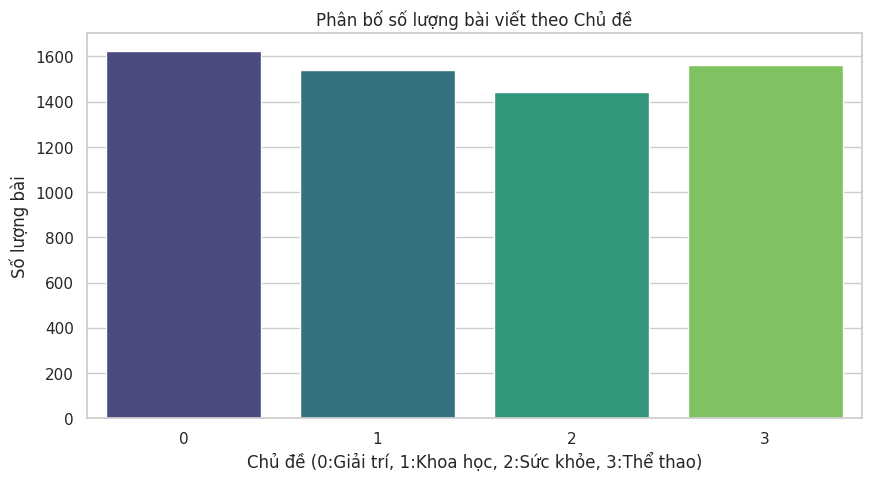

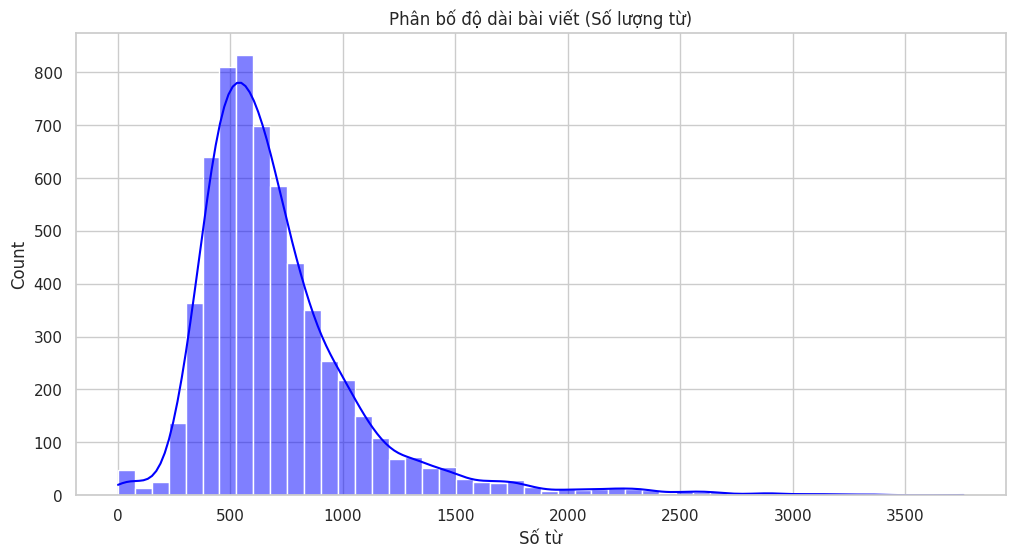

Độ dài trung bình: 714 từ
Bài ngắn nhất: 2 từ
Bài dài nhất: 3759 từ


In [35]:

# Thiết lập style cho đẹp
sns.set(style="whitegrid")

# 1. Biểu đồ phân bố số lượng bài viết (Class Distribution)
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Phân bố số lượng bài viết theo Chủ đề')
plt.xlabel('Chủ đề (0:Giải trí, 1:Khoa học, 2:Sức khỏe, 3:Thể thao)')
plt.ylabel('Số lượng bài')
plt.show()

# 2. Thống kê độ dài bài viết (Word Count)
# Đếm số từ trong mỗi bài (sau khi đã tách từ)
data['word_count'] = data['content_tokenized'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(data['word_count'], bins=50, kde=True, color='blue')
plt.title('Phân bố độ dài bài viết (Số lượng từ)')
plt.xlabel('Số từ')
plt.show()

# INSIGHTS:
print(f"Độ dài trung bình: {data['word_count'].mean():.0f} từ")
print(f"Bài ngắn nhất: {data['word_count'].min()} từ")
print(f"Bài dài nhất: {data['word_count'].max()} từ")

# Train and test

In [36]:


# Chia 80% để học (Train), 20% để thi (Test)
X_train, X_test, y_train, y_test = train_test_split(
    data['content_tokenized'],
    data['label'],
    test_size=0.2,
    random_state=42,
    stratify=data['label']  # Quan trọng: Chia đều tỷ lệ các topic
)

print(f"Số lượng bài để học: {len(X_train)}")
print(f"Số lượng bài để thi: {len(X_test)}")

Số lượng bài để học: 4929
Số lượng bài để thi: 1233


## TF-IDF and tNSE

In [37]:


# Chỉ lấy 3000 từ quan trọng nhất để giảm nhiễu
tfidf_vect = TfidfVectorizer(max_features=3000)

# Học từ điển từ tập Train và biến đổi thành số
X_train_tfidf = tfidf_vect.fit_transform(X_train)

# Áp dụng từ điển đó để biến đổi tập Test (KHÔNG fit lại)
X_test_tfidf = tfidf_vect.transform(X_test)

In [38]:


def print_top_keywords(tfidf_matrix, labels, vectorizer, top_n=10):
    """
    Hàm in ra top từ khóa quan trọng nhất của từng chủ đề
    """
    # 1. Lấy danh sách toàn bộ từ vựng (theo thứ tự index 0, 1, 2...)
    feature_names = np.array(vectorizer.get_feature_names_out())

    # Định nghĩa tên chủ đề cho dễ đọc
    topic_map = {0: 'Giải trí', 1: 'Khoa học', 2: 'Sức khỏe', 3: 'Thể thao'}

    # Tạo DataFrame để hiển thị cho đẹp
    df_top_words = pd.DataFrame()

    print(f"--- TOP {top_n} TỪ KHÓA QUAN TRỌNG NHẤT (THEO TF-IDF) ---")

    # Duyệt qua từng label (0, 1, 2, 3)
    for label_id in sorted(topic_map.keys()):
        label_name = topic_map[label_id]

        # Lấy các dòng dữ liệu thuộc về label này
        # (Lọc trong tập Train)
        row_indices = np.where(labels == label_id)[0]
        data_slice = tfidf_matrix[row_indices]

        # Tính trung bình cộng điểm TF-IDF của từng từ trong nhóm này
        # axis=0 nghĩa là tính dọc theo cột (từng từ)
        avg_tfidf_scores = np.mean(data_slice, axis=0)

        # Chuyển từ dạng matrix về mảng 1 chiều (array)
        avg_tfidf_scores = np.array(avg_tfidf_scores).flatten()

        # Sắp xếp để lấy index của các từ có điểm cao nhất
        # argsort xếp tăng dần, nên ta lấy [-top_n:] rồi đảo ngược [::-1]
        top_indices = avg_tfidf_scores.argsort()[-top_n:][::-1]

        # Lấy từ tương ứng
        top_words = feature_names[top_indices]

        # Đưa vào cột
        df_top_words[label_name] = top_words

    return df_top_words

# --- GỌI HÀM ---
# Lưu ý: Phải truyền X_train_tfidf (dạng số) và y_train (nhãn)
df_keywords = print_top_keywords(X_train_tfidf, y_train, tfidf_vect, top_n=50)

# Hiển thị bảng kết quả
print(df_keywords)

--- TOP 50 TỪ KHÓA QUAN TRỌNG NHẤT (THEO TF-IDF) ---
      Giải trí    Khoa học    Sức khỏe   Thể thao
0           và          và          và         và
1          của         của     ung_thư      games
2           cô         các         các        sea
3        trong       trong        bệnh        của
4         phim          là      bác_sĩ       trận
5           là   công_nghệ   bệnh_viện        u22
6          anh         một       trong        đội
7          năm        được   bệnh_nhân      trong
8          tôi         cho    điều_trị       thái
9        người    khoa_học          là   việt_nam
10        được          có          có         là
11         với  nghiên_cứu        y_tế        với
12       những         với       không        nam
13         cho       những        được        lan
14   diễn_viên         này         của       giải
15         một        loài       người    thi_đấu
16    khán_giả          đã         cho      giành
17         các      có_thể        giảm         

1. Topic: GIẢI TRÍ 🎬
Nhìn vào cột này, bỏ qua các từ "cô, của, và...", ta thấy ngay các từ mang đậm chất showbiz:

phim

diễn_viên

ca_sĩ

nghệ_sĩ

khán_giả

đạo_diễn

2. Topic: KHOA HỌC 🔬
Cột này từ vựng rất chuyên ngành và hiện đại:

công_nghệ

ai (Trí tuệ nhân tạo)

khoa_học

robot

dữ_liệu

hệ_thống / apple

3. Topic: SỨC KHỎE 🏥
Cột này cực kỳ rõ ràng, các từ khóa bệnh lý nổi lên rất sớm:

bác_sĩ

bệnh

viêm

thuốc

điều_trị
ung_thư

4. Topic: THỂ THAO ⚽
Mặc dù có từ "games", "sea" (do trùng đợt SEA Games) nhưng đặc trưng bóng đá vẫn rất rõ:

trận (trận đấu)

đội ( đội tuyển)

cầu_thủ

bàn (bàn thắng)

hlv (Huấn luyện viên)

bóng_đá

Đang tính toán điểm số TF-IDF cho các từ khóa...


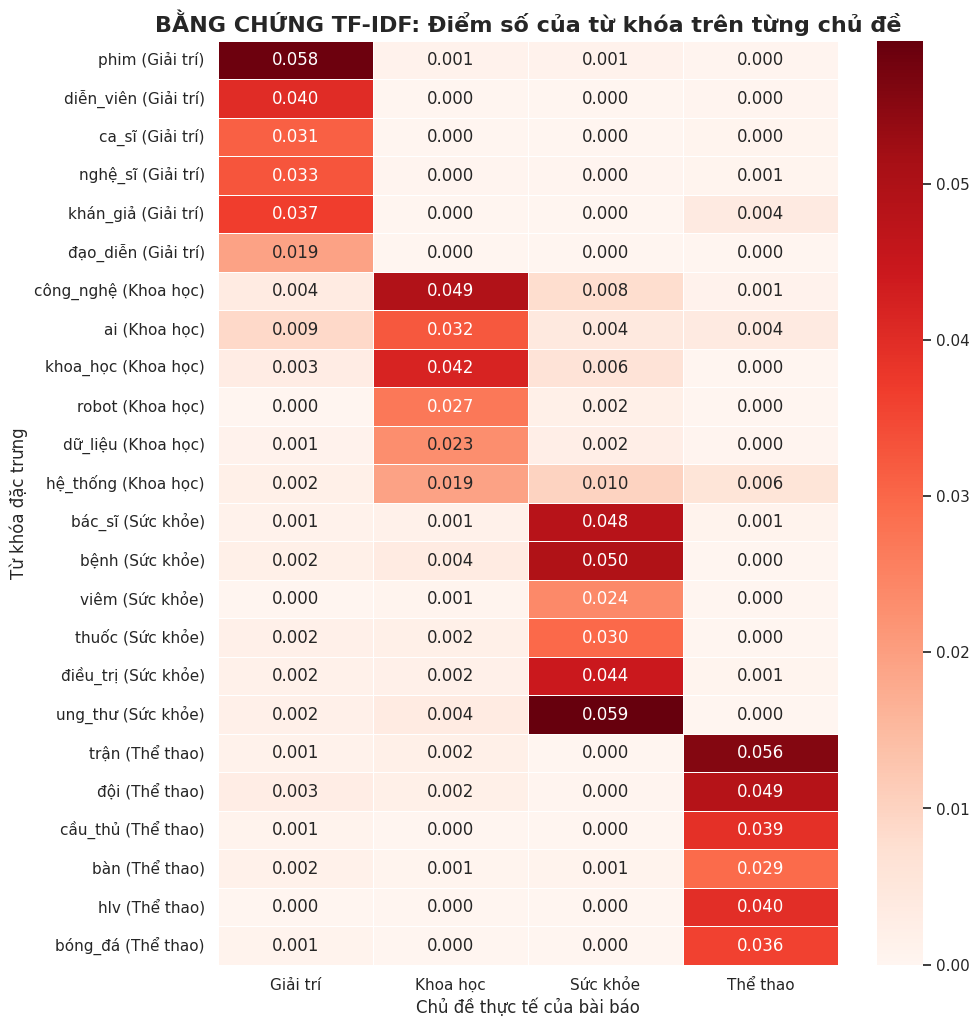

In [39]:
# 1. Định nghĩa danh sách từ khóa "Signature" bạn đã lọc ra
signature_keywords = {
    'Giải trí': ['phim', 'diễn_viên', 'ca_sĩ', 'nghệ_sĩ', 'khán_giả', 'đạo_diễn'],
    'Khoa học': ['công_nghệ', 'ai', 'khoa_học', 'robot', 'dữ_liệu', 'hệ_thống'],
    'Sức khỏe': ['bác_sĩ', 'bệnh', 'viêm', 'thuốc', 'điều_trị', 'ung_thư'],
    'Thể thao': ['trận', 'đội', 'cầu_thủ', 'bàn', 'hlv', 'bóng_đá']
}

# 2. Hàm tính điểm trung bình TF-IDF của các từ này trên từng chủ đề
def get_word_relevance(tfidf_matrix, labels, vectorizer, keywords_dict):
    # Lấy từ điển index: {'từ': 0, 'vựng': 1...}
    word2idx = vectorizer.vocabulary_

    # Tạo bảng kết quả
    topics = ['Giải trí', 'Khoa học', 'Sức khỏe', 'Thể thao']
    data_matrix = []
    row_labels = []

    # Duyệt qua từng nhóm từ khóa của từng chủ đề
    for topic_name, words in keywords_dict.items():
        for word in words:
            if word in word2idx:
                idx = word2idx[word]
                row_scores = []
                row_labels.append(f"{word} ({topic_name})")

                # Tính điểm trung bình của từ này trong từng topic (0, 1, 2, 3)
                for label_id in range(4):
                    # Lấy các bài báo thuộc topic label_id
                    indices = np.where(labels == label_id)[0]
                    # Tính trung bình cột tương ứng với từ word
                    mean_score = tfidf_matrix[indices, idx].mean()
                    row_scores.append(mean_score)

                data_matrix.append(row_scores)
            else:
                print(f"Cảnh báo: Từ '{word}' không có trong từ điển 3000 từ (có thể đã bị lọc hoặc ít gặp).")

    # Tạo DataFrame để vẽ
    df_heatmap = pd.DataFrame(data_matrix, columns=topics, index=row_labels)
    return df_heatmap

# 3. Tính toán dữ liệu
# Lưu ý: Dùng X_train_tfidf và y_train (hoặc X_tfidf nếu bạn gộp)
print("Đang tính toán điểm số TF-IDF cho các từ khóa...")
df_proof = get_word_relevance(X_train_tfidf, y_train, tfidf_vect, signature_keywords)

# 4. Vẽ Heatmap "Chứng minh"
plt.figure(figsize=(10, 12))
sns.heatmap(df_proof, annot=True, cmap='Reds', fmt=".3f", linewidths=0.5)

plt.title('BẰNG CHỨNG TF-IDF: Điểm số của từ khóa trên từng chủ đề', fontsize=16, fontweight='bold')
plt.xlabel('Chủ đề thực tế của bài báo', fontsize=12)
plt.ylabel('Từ khóa đặc trưng', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Biểu đồ Heatmap này là minh chứng rõ ràng nhất cho thấy dữ liệu đầu vào đã đạt chất lượng cao sau quá trình tiền xử lý (loại bỏ Stopwords). Thuật toán TF-IDF đã thành công trong việc biến đổi văn bản thành các vector số học có tính phân loại cao (high separability) và độc lập tuyến tính, tạo tiền đề vững chắc cho mô hình máy học đạt độ chính xác tối ưu.

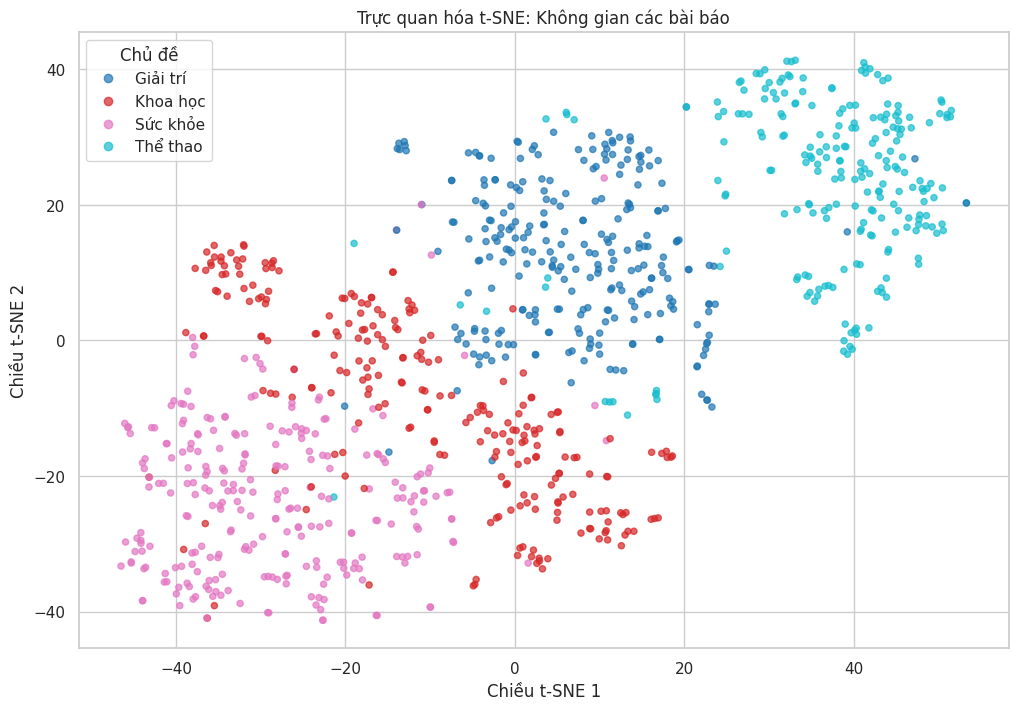

In [40]:


# Lấy mẫu 1000 điểm dữ liệu
num_samples = 1000
# Kiểm tra nếu dữ liệu ít hơn 1000 dòng thì lấy hết
if X_train_tfidf.shape[0] < num_samples:
    num_samples = X_train_tfidf.shape[0]

indices = np.random.choice(X_train_tfidf.shape[0], num_samples, replace=False)
X_subset = X_train_tfidf[indices]
y_subset = y_train.iloc[indices]


tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='random', learning_rate='auto')

# Fit dữ liệu

X_tsne = tsne.fit_transform(X_subset)

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
# Dùng cmap='jet' hoặc 'tab10' để màu sắc rực rỡ, dễ phân biệt hơn 'viridis'
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10', alpha=0.7, s=20)

plt.title('Trực quan hóa t-SNE: Không gian các bài báo')
plt.xlabel('Chiều t-SNE 1')
plt.ylabel('Chiều t-SNE 2')

# Tạo chú thích (Legend) rõ ràng cho từng chủ đề
# 0: Giải trí, 1: Khoa học, 2: Sức khỏe, 3: Thể thao
classes = ['Giải trí', 'Khoa học', 'Sức khỏe', 'Thể thao']
handles = scatter.legend_elements()[0]
plt.legend(handles, classes, title="Chủ đề")

plt.show()

=> good to train as 4 topic are easily to be clustered

## Model

### Navies Bayes

Đang huấn luyện mô hình Naive Bayes...

🎯 ĐỘ CHÍNH XÁC (Accuracy): 96.03%

📊 BẢNG KẾT QUẢ CHI TIẾT:
              precision    recall  f1-score   support

    Giải trí       0.97      0.96      0.96       325
    Khoa học       0.94      0.94      0.94       308
    Sức khỏe       0.95      0.96      0.95       288
    Thể thao       0.99      0.98      0.99       312

    accuracy                           0.96      1233
   macro avg       0.96      0.96      0.96      1233
weighted avg       0.96      0.96      0.96      1233



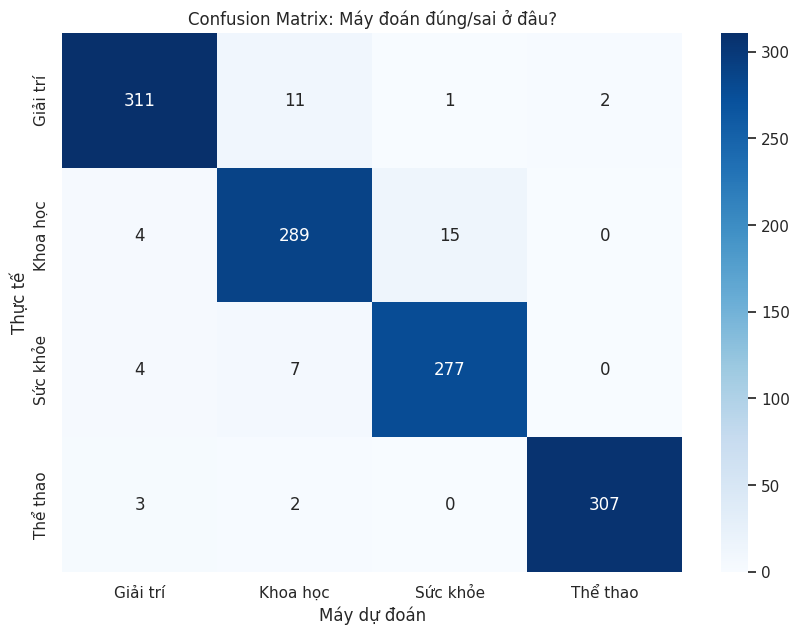

In [41]:


# --- BƯỚC 1: HUẤN LUYỆN (Training) ---
# Máy học mối quan hệ giữa bảng điểm X và nhãn y
print("Đang huấn luyện mô hình Naive Bayes...")
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# --- BƯỚC 2: DỰ ĐOÁN (Testing) ---
# Cho máy làm bài thi trên tập Test
y_pred = model.predict(X_test_tfidf)

# --- BƯỚC 3: XEM BẢNG ĐIỂM ---
# Tính độ chính xác tổng
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 ĐỘ CHÍNH XÁC (Accuracy): {acc*100:.2f}%")

# Báo cáo chi tiết từng môn (Từng Topic)
# 0: Giải trí, 1: Khoa học, 2: Sức khỏe, 3: Thể thao
target_names = ['Giải trí', 'Khoa học', 'Sức khỏe', 'Thể thao']
print("\n📊 BẢNG KẾT QUẢ CHI TIẾT:")
print(classification_report(y_test, y_pred, target_names=target_names))

# --- BƯỚC 4: VẼ MA TRẬN NHẦM LẪN (Confusion Matrix) ---
# Để xem máy hay nhầm chủ đề nào với chủ đề nào
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Máy dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix: Máy đoán đúng/sai ở đâu?')
plt.show()

### SVM

Đang huấn luyện mô hình SVM...

🎯 ĐỘ CHÍNH XÁC SVM (Accuracy): 97.65%

📊 BẢNG KẾT QUẢ CHI TIẾT (SVM):
              precision    recall  f1-score   support

    Giải trí       0.98      0.98      0.98       325
    Khoa học       0.97      0.96      0.97       308
    Sức khỏe       0.96      0.98      0.97       288
    Thể thao       0.99      0.99      0.99       312

    accuracy                           0.98      1233
   macro avg       0.98      0.98      0.98      1233
weighted avg       0.98      0.98      0.98      1233



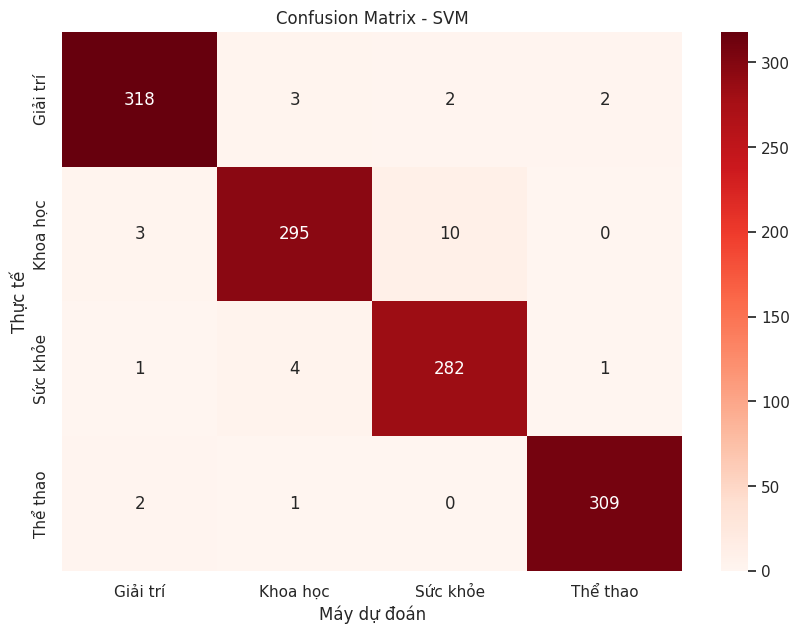

In [42]:


# --- BƯỚC 1: HUẤN LUYỆN (Training) ---
print("Đang huấn luyện mô hình SVM...")
# kernel='linear' thường hoạt động tốt nhất với dữ liệu văn bản nhiều chiều
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train_tfidf, y_train)

# --- BƯỚC 2: DỰ ĐOÁN (Testing) ---
y_pred_svm = model_svm.predict(X_test_tfidf)

# --- BƯỚC 3: XEM BẢNG ĐIỂM ---
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"\n🎯 ĐỘ CHÍNH XÁC SVM (Accuracy): {acc_svm*100:.2f}%")

target_names = ['Giải trí', 'Khoa học', 'Sức khỏe', 'Thể thao']
print("\n📊 BẢNG KẾT QUẢ CHI TIẾT (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=target_names))

# --- BƯỚC 4: VẼ MA TRẬN NHẦM LẪN ---
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds', # Đổi màu đỏ cho khác biệt
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Máy dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix - SVM')
plt.show()

### KNN

Đang huấn luyện mô hình KNN...

🎯 ĐỘ CHÍNH XÁC KNN (Accuracy): 96.27%

📊 BẢNG KẾT QUẢ CHI TIẾT (KNN):
              precision    recall  f1-score   support

    Giải trí       0.95      0.98      0.96       325
    Khoa học       0.95      0.94      0.95       308
    Sức khỏe       0.96      0.94      0.95       288
    Thể thao       0.99      0.98      0.99       312

    accuracy                           0.96      1233
   macro avg       0.96      0.96      0.96      1233
weighted avg       0.96      0.96      0.96      1233



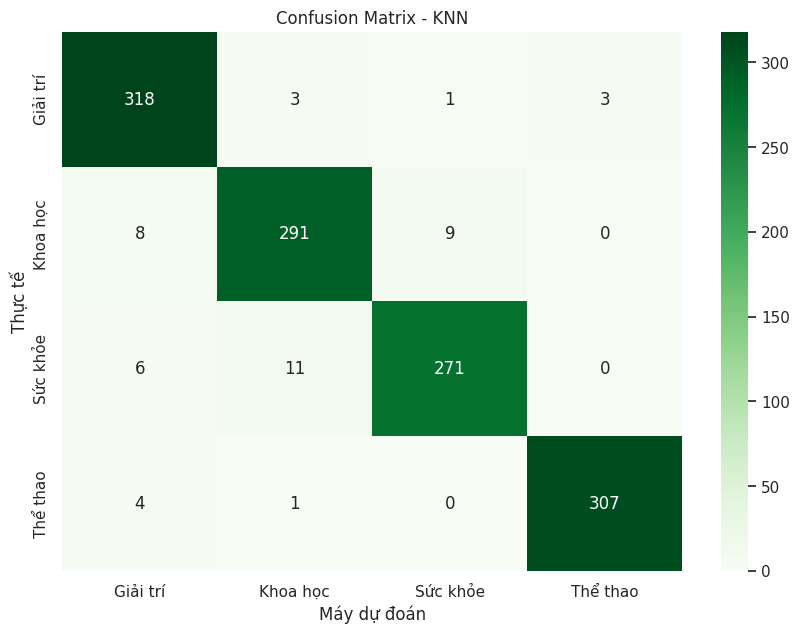

In [43]:

# --- BƯỚC 1: HUẤN LUYỆN (Training) ---
print("Đang huấn luyện mô hình KNN...")
# n_neighbors=5: Chọn 4 ông hàng xóm gần nhất để bỏ phiếu
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train_tfidf, y_train)

# --- BƯỚC 2: DỰ ĐOÁN (Testing) ---
y_pred_knn = model_knn.predict(X_test_tfidf)

# --- BƯỚC 3: XEM BẢNG ĐIỂM ---
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"\n🎯 ĐỘ CHÍNH XÁC KNN (Accuracy): {acc_knn*100:.2f}%")

target_names = ['Giải trí', 'Khoa học', 'Sức khỏe', 'Thể thao']
print("\n📊 BẢNG KẾT QUẢ CHI TIẾT (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=target_names))

# --- BƯỚC 4: VẼ MA TRẬN NHẦM LẪN ---
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', # Đổi màu xanh lá
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Máy dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix - KNN')
plt.show()